### Academic honesty statement



Place your academic honesty statement here. Here are some acceptable examples.

-   I worked alone on this assignment.
-   I worked with <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_\_</span></span></span></span> on this assignment.”
-   I received assistance from <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_</span></span></span></span> on this assignment.



### Binary batch distillation



This problem is a variation of the homework problem.
In the binary, batch distillation of benzene (1) and toluene (2), the moles of liquid $L$ remaining as a function of the mole fraction of toluene ($x_2$) is expressed by:

$\frac{dL}{dx_2} = \frac{L}{x_2 (k_2 - 1)}$

where $k_2$ is the vapor liquid equilibrium ratio for toluene. This can be computed as:

$k_i = P_i / P$ where $P_i = 10^{A_i + \frac{B_i}{T +C_i}}$ and that pressure is in mmHg, and the temperature is in degrees Celsius.

As the batch distillation progresses, the temperature changes in a way that $k_1(T) x_1 + k_2(T) x_2 = 1$, which is an algebraic constraint, with the additional relationship that $1 = x_1 + x_2$. In the homework, a differential equation was derived for the dependence of $T$ on $x_2$. We will consider an alternative approach here.  We define an *error* $\epsilon = 1 - k1 * x1 + k2 * x2$, and then we define a differential equation to change $T$ in a way that makes this error go to zero. We do this by multiplying the error by a proportionality constant that is large enough give an approximate equality in the constraint. For this problem you can choose $K_c = 0.5 \times 10^6$. Note this means when the error is positive, that the temperature is too low, so it gets driven up, and when it is negative, the temperature is too high, so it gets driven down.

$\frac{dT}{dx_2} = K_c \epsilon$

The following information is given:

The total pressure is fixed at 1.2 atm, and the distillation starts at $x_2=0.4$ and an initial temperature of 95.6 degrees Celsius. There are initially 100 moles in the distillation.

| species|A|B|C|
|---|---|---|---|
| benzene|6.90565|-1211.033|220.79|
| toluene|6.95464|-1344.8|219.482|

First, plot $x_2$ and $T$ over the range of $x_2=0.4$ to $x_2=0.8$.



Hint: The final temperature is about 108 degrees Celsius.

Second, show that the constraint $k_1(T) x_1 + k_2(T) x_2 = 1$ is approximately true. Comment on how true it is, and what effect this could have on the solution.



### solution



# Out [9]:


# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

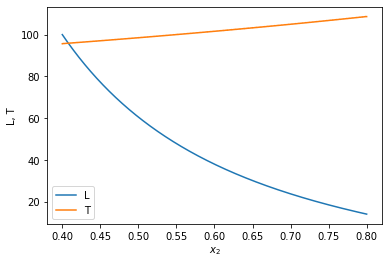

In [1]:
A1, B1, C1 = 6.90565, -1211.033, 220.79
A2, B2, C2 = 6.95464, -1344.8, 219.482

P = (760 * 1.2) # mmHg
Kc = 0.5 * 1e6

def ode(x2, X):
    L, T = X

    P1 = 10**(A1 + B1 / (T + C1))
    P2 = 10**(A2 + B2 / (T + C2))

    k1 = P1 / P
    k2 = P2 / P
    x1 = 1 - x2

    dLdx2  = L / (x2 * (k2 - 1))
    error = 1 - (k1 * x1 + k2 * x2)

    dTdx2 = Kc * error
    return dLdx2, dTdx2

from scipy.integrate import solve_ivp

X0 = (100, 95.6)
x2_span = (0.4, 0.8)
sol = solve_ivp(ode,  x2_span, X0)
sol

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y.T)
plt.xlabel('$x_2$')
plt.ylabel('L, T')
plt.legend(['L', 'T'])

You may notice there is some "jiggle" in the temperature. That is caused by the approximate way we correct the temperature. It can be difficult to see, and depends on the details of how you setup your solution.



# Out [10]:
# text/plain
Text(0, 0.5, 'T')

# text/plain
<Figure size 576x432 with 1 Axes>

# image/png

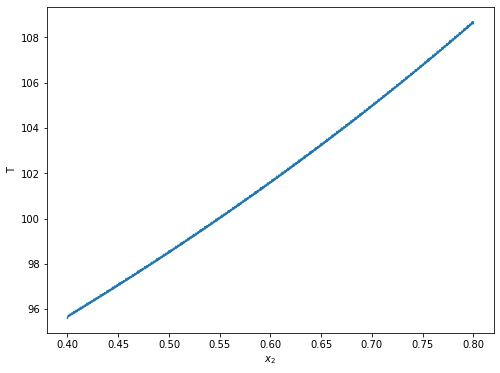

In [1]:
x2 = sol.t
T = sol.y[1]
plt.figure(figsize=(8, 6))
plt.plot(x2, T)
plt.xlabel('$x_2$')
plt.ylabel('T')

To show the constraint is approximately valid, we use the solution we got from above and plot the value of the constraint. We should see graphically that it is approximately true.



# Out [11]:
# text/plain
Text(0, 0.5, 'LHS of constraint')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

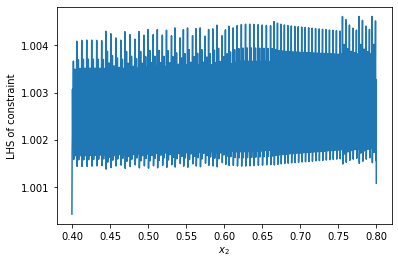

In [1]:
T = sol.y[1]
x2 = sol.t
x1 = 1 - x2

P1 = 10**(A1 + B1 / (T + C1))
P2 = 10**(A2 + B2 / (T + C2))

k1 = P1 / P
k2 = P2 / P

plt.plot(x2, k1 * x1 + k2 * x2)
plt.xlabel('$x_2$')
plt.ylabel('LHS of constraint')

This shows that the constraint is approximately observed. There is some noise because of the "controller". Alternatively, we can show that the max error is small.



In [1]:
np.max(np.abs(1 -  k1 * x1 - k2 * x2))

# Out [17]:
# text/plain
0.00460968835837694

Or that all the errors are smaller than a tolerance, in this case something a little bigger than the max error.



In [1]:
import numpy as np
np.all(np.abs(1 -  k1 * x1 - k2 * x2) < 5e-3)

# Out [16]:
# text/plain
True

To get better than this, you have to force the integrator to take smaller steps, but the approach taken in the homework is better still since it is not an approximation.

